# Network Generator
This is a notebook to help creating new networks by visualizing them. Use the `run all` button

In [43]:
import random
import os
from cyberwheel.network.network_generation.network_generator import NetworkYAMLGenerator
from cyberwheel.network.network_base import Network
print(os.getcwd())

/home/70d/cyberwheel/cyberwheel/network/network_generation


In [44]:
name = "100-host-network"
num_subnets = 3
num_hosts_per_subnet = 20
network = NetworkYAMLGenerator(network_name=name)

## Add router

In [45]:
network.router("core_router")

## Add Subnets

In [46]:
for i in range(num_subnets):
    network.subnet(f"subnet{i}", "core_router", ip_range="192.168.0.0/24")
network.subnet(f"server_subnet0", "core_router", ip_range="192.168.0.0/24")
network.subnet(f"server_subnet1", "core_router", ip_range="192.168.0.0/24")

## Add Hosts to Subnets

First, specify some host types to randomly pick from. Seed the RNG to get the same network each time.

In [47]:
server_types = ["mail_server", "file_server", "web_server", "ssh_jump_server", "proxy_server"]
all_types = ["mail_server", "file_server", "web_server", "ssh_jump_server", "proxy_server", "workstation", "workstation", "workstation", "workstation", "workstation"]
# random.seed(10)

Use for loops to create multiple hosts on a subnet at one time

In [48]:
subnet = 0
for i in range(num_hosts_per_subnet*num_subnets):
    if i != 0 and not i % num_hosts_per_subnet:
        subnet += 1
        network.interface(f"host{i}", f"host{i-1}")
        network.interface(f"host{i-1}", f"host{i}")
    # if subnet % 2:
    #     network.host(f"host{i}", f"subnet{subnet}", random.choice(server_types))
    # else:
    network.host(f"host{i}", f"subnet{subnet}", "workstation")

### Add some servers

In [49]:
for i in range(20):
    network.host(f"server{i}", "server_subnet0", random.choice(server_types))
    network.host(f"server{i+20}", "server_subnet1", random.choice(server_types))
network.interface("server0", "host0")
network.interface("host0", "server0")
network.interface("server20", f"host{num_hosts_per_subnet*num_subnets-1}")
network.interface(f"host{num_hosts_per_subnet*num_subnets-1}", "server20")

## Create the YAML file in the CWD

In [50]:
network.output_yaml("../../resources/metadata")

## Visualize the New Network

In [51]:
cyberwheel_network=Network.create_network_from_yaml("../../resources/metadata/"+ name + ".yaml")

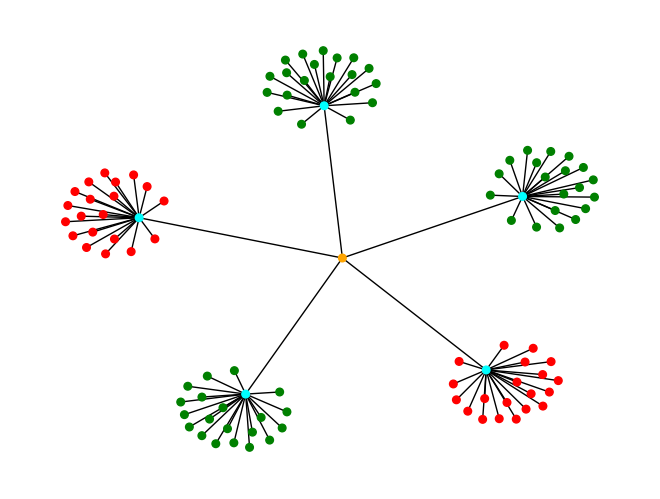

In [52]:
cyberwheel_network.draw(filename="")